In [1]:
!pip install tensorflow==2.0.0-rc1

     |████████████████████████████████| 86.3MB 142kB/s 
     |████████████████████████████████| 501kB 42.7MB/s 
     |████████████████████████████████| 4.3MB 27.8MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc1


In [0]:
### 첫번째

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


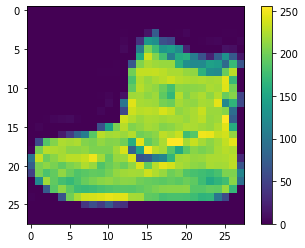

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

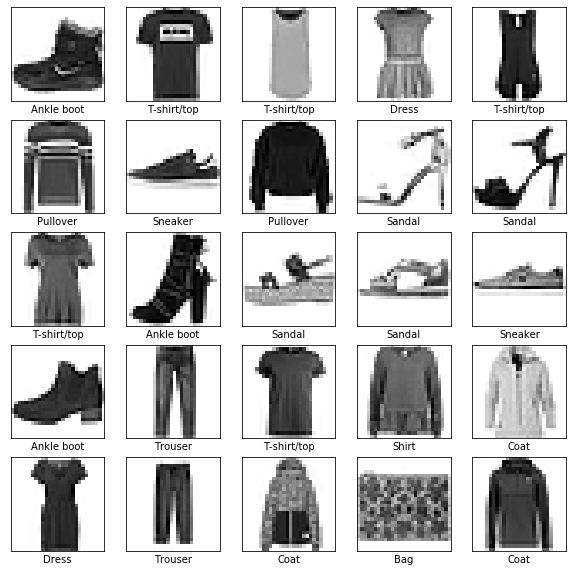

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.5002 - accuracy: 0.8232
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3731 - accuracy: 0.8651
Epoch 3/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3346 - accuracy: 0.8777
Epoch 4/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3118 - accuracy: 0.8860
Epoch 5/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2945 - accuracy: 0.8916


In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

10000/1 - 1s - loss: 0.2426 - accuracy: 0.8732
0.8732


In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=3)
print(test_acc)

0.8732


In [0]:
predictions = model.predict(test_images)

In [26]:
predictions[0]

array([1.2288092e-06, 1.7092310e-08, 5.0267550e-07, 3.5103731e-08,
       1.7925122e-07, 1.9070797e-04, 1.3323787e-06, 2.9394131e-02,
       1.6156783e-06, 9.7041029e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [28]:
test_labels[0]

9

In [29]:
test_labels[1]

2

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

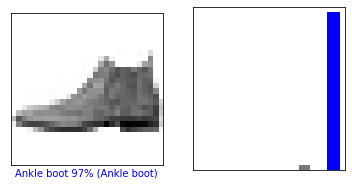

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

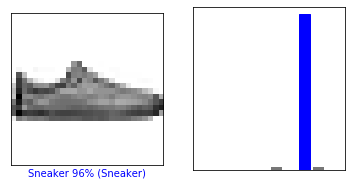

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

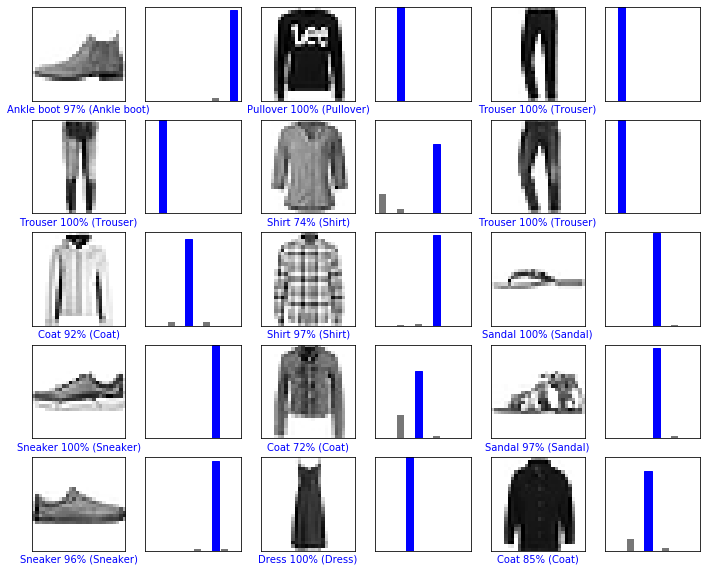

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [34]:
img = test_images[0]

print(img.shape)

(28, 28)


In [0]:
img = np.expand_dims(img, 0)
# 2차원 배열로 만들기

In [36]:
print(img.shape)

(1, 28, 28)


In [37]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.2288069e-06 1.7092276e-08 5.0267403e-07 3.5103731e-08 1.7925103e-07
  1.9070778e-04 1.3323761e-06 2.9394103e-02 1.6156768e-06 9.7041029e-01]]


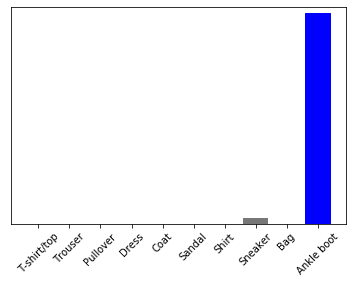

In [38]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [39]:
np.argmax(predictions_single[0])

9

In [0]:
### 2번째

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [43]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.5003 - accuracy: 0.8240
Epoch 2/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3819 - accuracy: 0.8622
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3403 - accuracy: 0.8770
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3166 - accuracy: 0.8833
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2981 - accuracy: 0.8904
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2840 - accuracy: 0.8956
Epoch 7/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2698 - accuracy: 0.9005
Epoch 8/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2587 - accuracy: 0.9033
Epoch 9/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2484 - accuracy: 0.9082
Epoch 10/10
60

In [44]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

10000/1 - 1s - loss: 0.2531 - accuracy: 0.8826
0.8826


In [0]:
predictions = model.predict(test_images)

In [46]:
predictions[0]

array([6.9131708e-08, 2.0436572e-09, 1.4938061e-09, 6.0608901e-10,
       1.7559556e-09, 4.4525107e-03, 1.1490218e-08, 8.1217233e-03,
       2.9516585e-07, 9.8742539e-01], dtype=float32)

In [47]:
np.argmax(predictions[0])

9

In [48]:
test_labels[0]

9

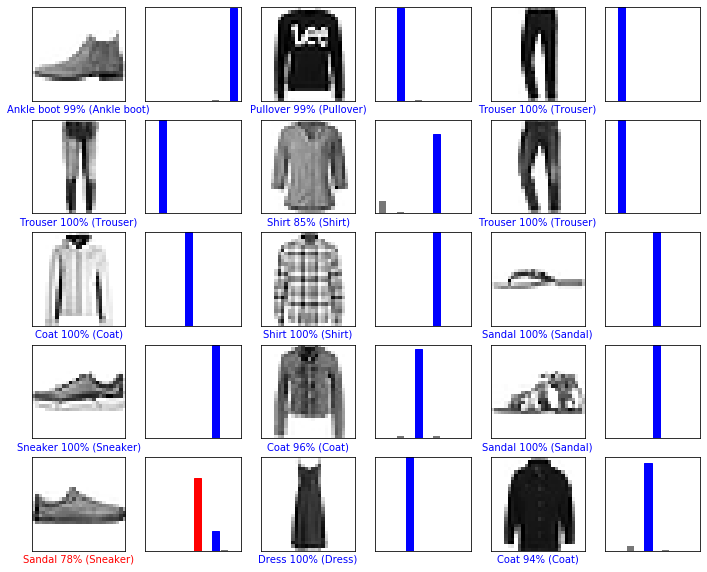

In [49]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [0]:
### 3번째

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [53]:
model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4989 - accuracy: 0.8253
Epoch 2/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3761 - accuracy: 0.8643
Epoch 3/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3388 - accuracy: 0.8763
Epoch 4/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3150 - accuracy: 0.8857
Epoch 5/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2972 - accuracy: 0.8914
Epoch 6/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2830 - accuracy: 0.8948
Epoch 7/20
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2701 - accuracy: 0.8991
Epoch 8/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2597 - accuracy: 0.9035
Epoch 9/20
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2530 - accuracy: 0.9054
Epoch 10/20
60

In [54]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

10000/1 - 1s - loss: 0.2915 - accuracy: 0.8880
0.888


In [0]:
predictions = model.predict(test_images)

In [56]:
np.argmax(predictions[0])

9

In [57]:
test_labels[0]

9

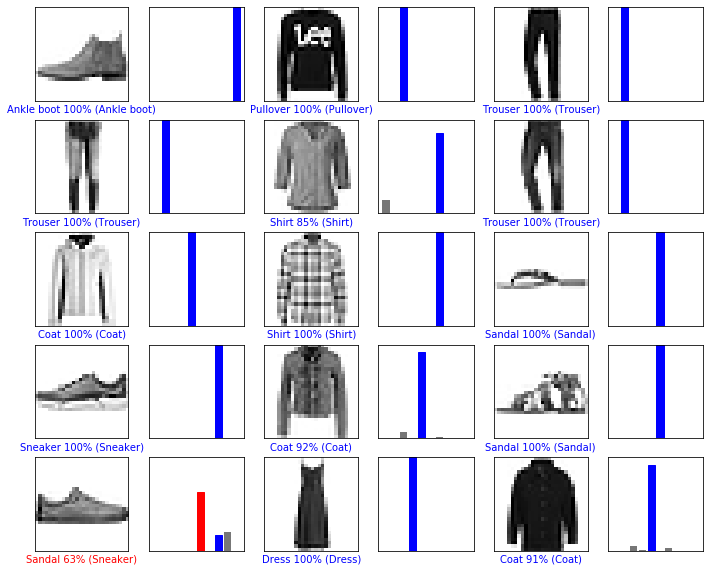

In [58]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [0]:
### 암기

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])


In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [62]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4954 - accuracy: 0.8253
Epoch 2/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3738 - accuracy: 0.8659
Epoch 3/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3355 - accuracy: 0.8767
Epoch 4/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3117 - accuracy: 0.8866
Epoch 5/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2952 - accuracy: 0.8919


In [63]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

10000/1 - 1s - loss: 0.2600 - accuracy: 0.8780
0.878


In [0]:
predictions = model.predict(test_images)

In [65]:
np.argmax(predictions[0])

9

In [66]:
test_labels[0]

9

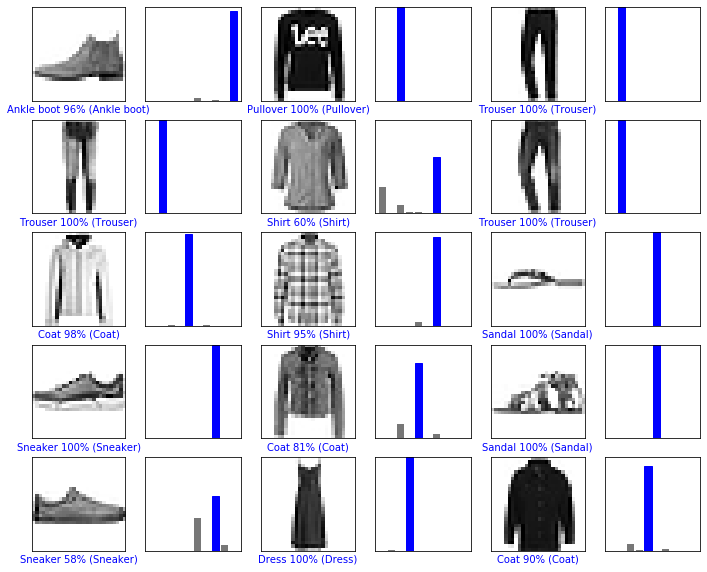

In [67]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

### basic_text_classification
# 1)

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import tensorflow as tf
# !pip install tf-nightly-2.0-preview

import tensorflow_hub as hub
import tensorflow_datasets as tfds

print("버전: ", tf.__version__)
print("즉시 실행 모드: ", tf.executing_eagerly())
print("허브 버전: ", hub.__version__)
print("GPU ", "사용 가능" if tf.config.experimental.list_physical_devices("GPU") else "사용 불가능")

버전:  2.0.0-rc1
즉시 실행 모드:  True
허브 버전:  0.7.0
GPU  사용 불가능


In [0]:
train_validation_split = tfds.Split.TRAIN.subsplit([6,4])

In [6]:
train_validation_split

(NamedSplit('train')(tfds.percent[0:60]),
 NamedSplit('train')(tfds.percent[60:100]))

In [7]:
(train_data, validation_data), test_data = tfds.load(name="imdb_reviews",
                                                     split=(train_validation_split, tfds.Split.TEST),
                                                     as_supervised=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [0]:
tfds.load?

In [0]:
tfds.Split?

In [0]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

In [10]:
train_examples_batch

<tf.Tensor: id=224, shape=(10,), dtype=string, numpy=
array([b"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a clich\xc3\xa9, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the story p

In [11]:
train_labels_batch

<tf.Tensor: id=225, shape=(10,), dtype=int64, numpy=array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0])>

In [12]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                            dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [13]:
hub_layer(train_examples_batch[:3])

<tf.Tensor: id=480, shape=(3, 20), dtype=float32, numpy=
array([[ 3.9819887 , -4.4838037 ,  5.177359  , -2.3643482 , -3.2938678 ,
        -3.5364532 , -2.4786978 ,  2.5525482 ,  6.688532  , -2.3076782 ,
        -1.9807833 ,  1.1315885 , -3.0339816 , -0.7604128 , -5.743445  ,
         3.4242578 ,  4.790099  , -4.03061   , -5.992149  , -1.7297493 ],
       [ 3.4232912 , -4.230874  ,  4.1488533 , -0.29553518, -6.802391  ,
        -2.5163853 , -4.4002395 ,  1.905792  ,  4.7512794 , -0.40538004,
        -4.3401685 ,  1.0361497 ,  0.9744097 ,  0.71507156, -6.2657013 ,
         0.16533905,  4.560262  , -1.3106939 , -3.1121316 , -2.1338716 ],
       [ 3.8508697 , -5.003031  ,  4.8700504 , -0.04324996, -5.893603  ,
        -5.2983093 , -4.004676  ,  4.1236343 ,  6.267754  ,  0.11632943,
        -3.5934832 ,  0.8023905 ,  0.56146765,  0.9192484 , -7.3066816 ,
         2.8202746 ,  6.2000837 , -3.5709393 , -4.564525  , -2.305622  ]],
      dtype=float32)>

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(train_data.shuffle(10000).repeat().batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


30/30 [==============================] - 10s 321ms/step - loss: 0.9138 - accuracy: 0.4821 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 9s 301ms/step - loss: 0.7031 - accuracy: 0.5445 - val_loss: 0.6619 - val_accuracy: 0.6056
Epoch 3/20
30/30 [==============================] - 9s 302ms/step - loss: 0.6373 - accuracy: 0.6510 - val_loss: 0.6086 - val_accuracy: 0.6852
Epoch 4/20
30/30 [==============================] - 9s 301ms/step - loss: 0.5952 - accuracy: 0.7010 - val_loss: 0.5753 - val_accuracy: 0.7119
Epoch 5/20
30/30 [==============================] - 9s 289ms/step - loss: 0.5623 - accuracy: 0.7287 - val_loss: 0.5460 - val_accuracy: 0.7381
Epoch 6/20
30/30 [==============================] - 9s 293ms/step - loss: 0.5302 - accuracy: 0.7559 - val_loss: 0.5160 - val_accuracy: 0.7625
Epoch 7/20
30/30 [==============================] - 9s 287ms/step - loss: 0.4964 - accuracy: 0.7839 - val_loss: 0.4843 - val_accuracy: 0.7855
Epoch 8/

In [18]:
results = model.evaluate(test_data.batch(512), verbose=2)
for name, value in zip(model.metrics_names, results):
  print(f"{name}-{value:.3f}")

49/49 - 5s - loss: 0.3117 - accuracy: 0.8688
loss-0.312
accuracy-0.869


In [0]:
### 2번째

In [0]:
(train_data, validation_data), test_data = tfds.load(name="imdb_reviews",
                                                     split=(train_validation_split, tfds.Split.TEST),
                                                     as_supervised=True)

In [0]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

In [22]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                            dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[:3])

<tf.Tensor: id=5538, shape=(3, 20), dtype=float32, numpy=
array([[ 3.9819887 , -4.4838037 ,  5.177359  , -2.3643482 , -3.2938678 ,
        -3.5364532 , -2.4786978 ,  2.5525482 ,  6.688532  , -2.3076782 ,
        -1.9807833 ,  1.1315885 , -3.0339816 , -0.7604128 , -5.743445  ,
         3.4242578 ,  4.790099  , -4.03061   , -5.992149  , -1.7297493 ],
       [ 3.4232912 , -4.230874  ,  4.1488533 , -0.29553518, -6.802391  ,
        -2.5163853 , -4.4002395 ,  1.905792  ,  4.7512794 , -0.40538004,
        -4.3401685 ,  1.0361497 ,  0.9744097 ,  0.71507156, -6.2657013 ,
         0.16533905,  4.560262  , -1.3106939 , -3.1121316 , -2.1338716 ],
       [ 3.8508697 , -5.003031  ,  4.8700504 , -0.04324996, -5.893603  ,
        -5.2983093 , -4.004676  ,  4.1236343 ,  6.267754  ,  0.11632943,
        -3.5934832 ,  0.8023905 ,  0.56146765,  0.9192484 , -7.3066816 ,
         2.8202746 ,  6.2000837 , -3.5709393 , -4.564525  , -2.305622  ]],
      dtype=float32)>

In [23]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit(train_data.shuffle(10000).repeat().batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 11s 368ms/step - loss: 0.9908 - accuracy: 0.5125 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 10s 333ms/step - loss: 0.6633 - accuracy: 0.6260 - val_loss: 0.6268 - val_accuracy: 0.6531
Epoch 3/20
30/30 [==============================] - 9s 310ms/step - loss: 0.6088 - accuracy: 0.6754 - val_loss: 0.5951 - val_accuracy: 0.6835
Epoch 4/20
30/30 [==============================] - 9s 307ms/step - loss: 0.5768 - accuracy: 0.7043 - val_loss: 0.5669 - val_accuracy: 0.7103
Epoch 5/20
30/30 [==============================] - 9s 295ms/step - loss: 0.5468 - accuracy: 0.7316 - val_loss: 0.5399 - val_accuracy: 0.7358
Epoch 6/20
30/30 [==============================] - 9s 296ms/step - loss: 0.5158 - accuracy: 0.7573 - val_loss: 0.5127 - val_accuracy: 0.7571
Epoch 7/20
30/30 [==============================] - 9s 302ms/step - loss: 0.4802 - accuracy: 0.7831 - val_loss: 0.4850 - val_accuracy: 0.7

In [26]:
results = model.evaluate(test_data.batch(512), verbose=2)
for name, value in zip(model.metrics_names, results):
  print(f"{name}-{value:.3f}")

49/49 - 6s - loss: 0.3208 - accuracy: 0.8618
loss-0.321
accuracy-0.862


In [0]:
# 3번째

In [0]:
(train_data, validation_data), test_data = tfds.load(name="imdb_reviews",
                                                     split=(train_validation_split, tfds.Split.TEST),
                                                     as_supervised=True)

In [29]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                            dtype=tf.string, trainable=True)

model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
history = model.fit(train_data.shuffle(10000).repeat().batch(512),
                    epochs=10,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/10
30/30 [==============================] - 10s 348ms/step - loss: 0.7476 - accuracy: 0.5260 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
30/30 [==============================] - 9s 306ms/step - loss: 0.6643 - accuracy: 0.6196 - val_loss: 0.6210 - val_accuracy: 0.6647
Epoch 3/10
30/30 [==============================] - 9s 294ms/step - loss: 0.5997 - accuracy: 0.6935 - val_loss: 0.5700 - val_accuracy: 0.7103
Epoch 4/10
30/30 [==============================] - 9s 298ms/step - loss: 0.5481 - accuracy: 0.7362 - val_loss: 0.5338 - val_accuracy: 0.7392
Epoch 5/10
30/30 [==============================] - 9s 299ms/step - loss: 0.5103 - accuracy: 0.7651 - val_loss: 0.5031 - val_accuracy: 0.7601
Epoch 6/10
30/30 [==============================] - 10s 327ms/step - loss: 0.4724 - accuracy: 0.7877 - val_loss: 0.4737 - val_accuracy: 0.7783
Epoch 7/10
30/30 [==============================] - 10s 325ms/step - loss: 0.4380 - accuracy: 0.8059 - val_loss: 0.4490 - val_accuracy: 0.

In [32]:
results = model.evaluate(test_data.batch(512), verbose=2)
for name, value in zip(model.metrics_names, results):
  print(f"{name}-{value:.3f}")

49/49 - 6s - loss: 0.3917 - accuracy: 0.8282
loss-0.392
accuracy-0.828


In [0]:
# 암기

In [0]:
(train_data, validation_data), test_data = tfds.load(name="imdb_reviews",
                                                     split=(train_validation_split, tfds.Split.TEST),
                                                     as_supervised=True)

In [0]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)

In [36]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_6 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(train_data.shuffle(10000).batch(512), epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 [==============================] - 10s 337ms/step - loss: 0.7980 - accuracy: 0.4831 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 9s 316ms/step - loss: 0.7110 - accuracy: 0.5561 - val_loss: 0.6786 - val_accuracy: 0.5829
Epoch 3/20
30/30 [==============================] - 10s 318ms/step - loss: 0.6555 - accuracy: 0.6247 - val_loss: 0.6342 - val_accuracy: 0.6448
Epoch 4/20
30/30 [==============================] - 9s 309ms/step - loss: 0.6109 - accuracy: 0.6811 - val_loss: 0.5933 - val_accuracy: 0.6974
Epoch 5/20
30/30 [==============================] - 10s 321ms/step - loss: 0.5656 - accuracy: 0.7385 - val_loss: 0.5512 - val_accuracy: 0.7383
Epoch 6/20
30/30 [==============================] - 10s 317ms/step - loss: 0.5205 - accuracy: 0.7743 - val_loss: 0.5097 - val_accuracy: 0.7693
Epoch 7/20
30/30 [==============================] - 9s 299ms/step - loss: 0.4733 - accuracy: 0.8015 - val_loss: 0.4676 - val_accuracy: 0

In [39]:
results = model.evaluate(test_data.batch(512), verbose=2)
for name, value in zip(model.metrics_names, results):
  print(f"{name}-{value:.3f}")

49/49 - 6s - loss: 0.3116 - accuracy: 0.8662
loss-0.312
accuracy-0.866


### 자동차 연비 예측하기 : 회귀

In [0]:
### 1번째

In [41]:
!pip install seaborn

In [42]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

TensorFlow is already loaded. Please restart the runtime to change versions.
2.0.0-rc1


In [43]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 1us/step


'/root/.keras/datasets/auto-mpg.data'

In [44]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [45]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
dataset = dataset.dropna()

In [0]:
origin = dataset.pop('Origin')

In [48]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

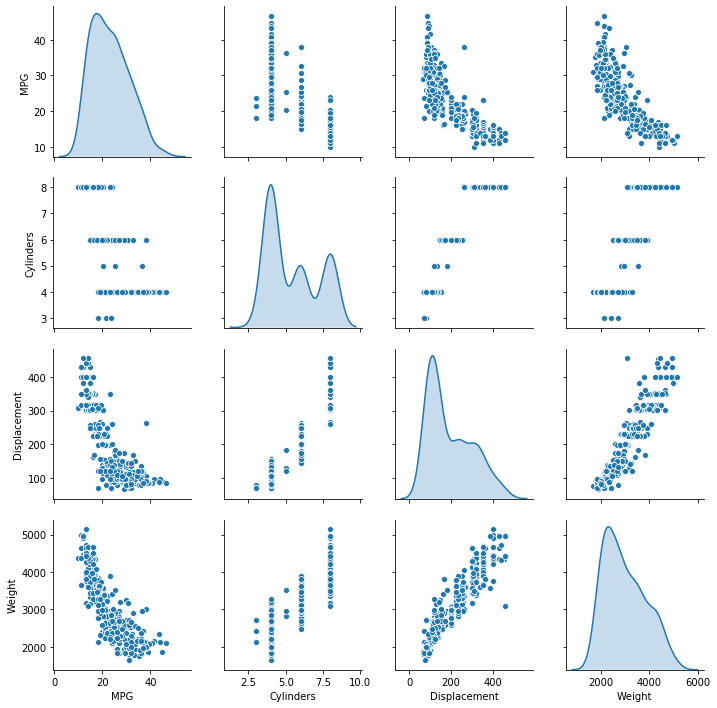

In [51]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde");

In [52]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [0]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [0]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [0]:
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [0]:
def build_model():
    model = keras.Sequential([
                              layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(1)
    
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse', optimizer=optimizer,
                  metrics=['mae', 'mse'])
    
    return model

In [0]:
model = build_model()

In [62]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [63]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.15619339],
       [ 0.08615131],
       [ 0.06647514],
       [ 0.05696105],
       [-0.30992827],
       [ 0.06499256],
       [-0.33010572],
       [-0.04498283],
       [ 0.11147555],
       [-0.46620896]], dtype=float32)

In [0]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')

In [69]:
EPOCHS = 1000

history = model.fit(normed_train_data, train_labels,
                    epochs=EPOCHS, validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [70]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.227636,0.920307,2.227636,9.106833,2.360636,9.106833,995
996,2.261141,0.922940,2.261142,8.750375,2.314474,8.750376,996
997,2.397323,0.931810,2.397323,9.592868,2.440593,9.592869,997
998,2.240598,0.913725,2.240598,8.671939,2.286793,8.671939,998
999,2.380750,0.982361,2.380750,9.354826,2.422001,9.354826,999


In [0]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
            label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
            label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
            label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

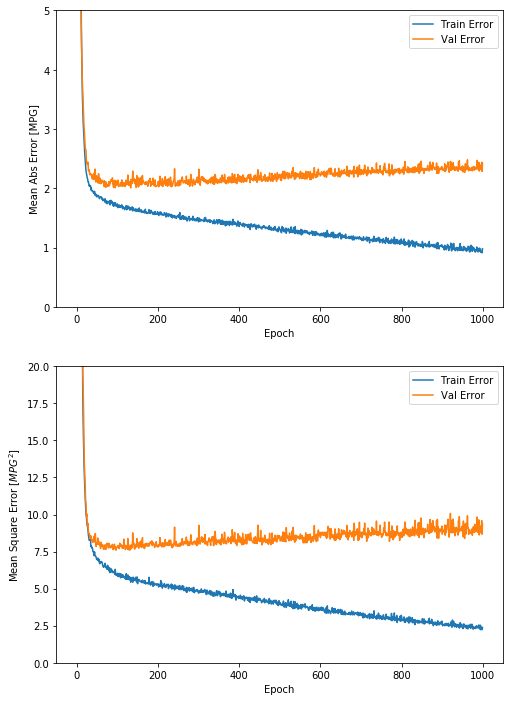

In [73]:
plot_history(history)


.......................................................

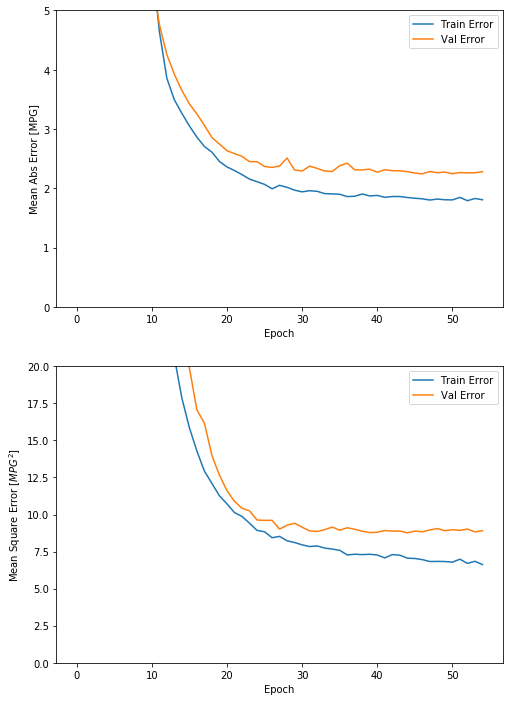

In [74]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, 
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [75]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print(f"테스트 세트의 평균 절대 오차: {mae:5.2f} MPG")

78/78 - 0s - loss: 5.8898 - mae: 1.8444 - mse: 5.8898
테스트 세트의 평균 절대 오차:  1.84 MPG


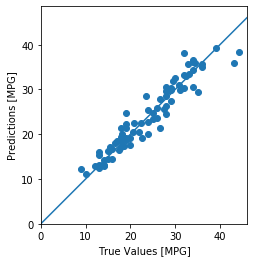

In [76]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

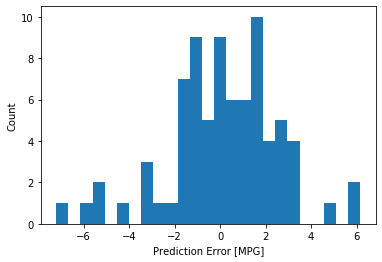

In [77]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [0]:
### 2번째

In [0]:
def build_model():
    model = keras.Sequential([
                              layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(1)
    
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse', optimizer=optimizer,
                  metrics=['mae', 'mse'])
    
    return model

In [80]:
model = build_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [0]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')


..................................................................

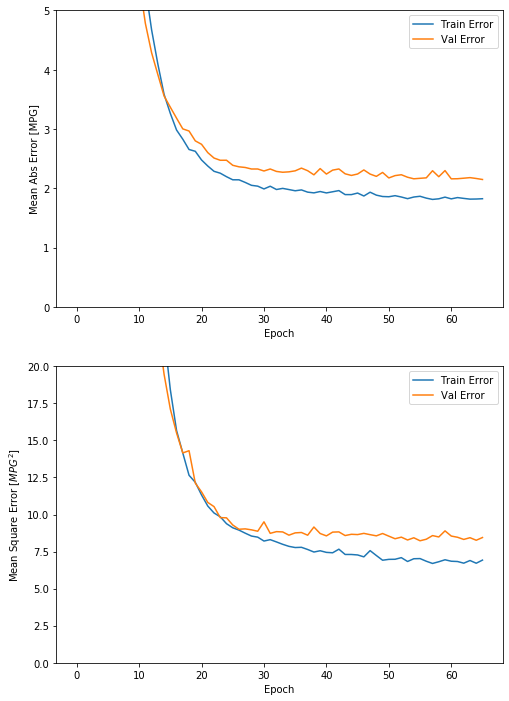

In [83]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, 
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [88]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print(f"테스트 세트의 평균 절대 오차: {mae:5.2f} MPG, MSE는 {mse:.2f}")

78/78 - 0s - loss: 6.1045 - mae: 1.9355 - mse: 6.1045
테스트 세트의 평균 절대 오차:  1.94 MPG, MSE는 6.10


In [0]:
### 3번째

In [0]:
def build_model():
    model = keras.Sequential([
                              layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(1)
    
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse', optimizer=optimizer,
                  metrics=['mae', 'mse'])
    
    return model

In [0]:
model = build_model()

In [93]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, 
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])



................................

In [94]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print(f"테스트 세트의 평균 절대 오차: {mae:5.2f} MPG, MSE는 {mse:.2f}")

78/78 - 0s - loss: 6.1561 - mae: 1.8505 - mse: 6.1561
테스트 세트의 평균 절대 오차:  1.85 MPG, MSE는 6.16


In [0]:
### 암기

In [0]:
def build_model():
    model = keras.Sequential([
                              layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(1)
    
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse', optimizer=optimizer,
                  metrics=['mae', 'mse'])
    
    return model

In [0]:
model = build_model()

In [98]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, 
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


......................................................................

In [100]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print(f"테스트 세트의 평균 절대 오차: {mae:5.2f} MPG, MSE는 {mse:.2f}, Loss는 {loss:.4f}")

78/78 - 0s - loss: 5.9931 - mae: 1.8876 - mse: 5.9931
테스트 세트의 평균 절대 오차:  1.89 MPG, MSE는 5.99, Loss는 5.9931


### Estimator 사용하기

In [0]:
# 1번째

In [102]:
!pip install sklearn

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

In [104]:
try:
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [106]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [107]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [108]:
dftrain.shape[0], dfeval.shape[0]

(627, 264)

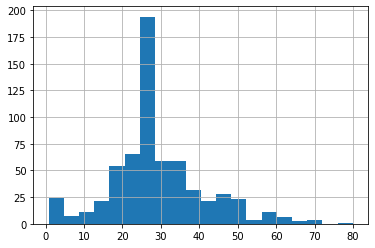

In [109]:
dftrain.age.hist(bins=20)

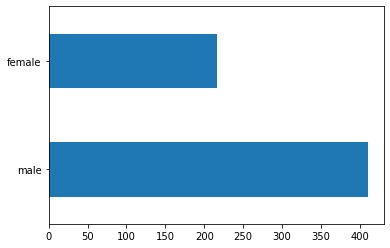

In [110]:
dftrain.sex.value_counts().plot(kind='barh')

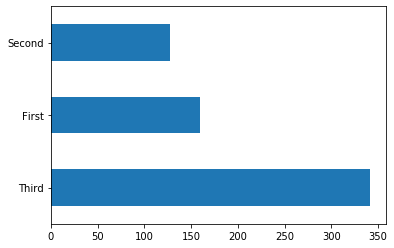

In [111]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

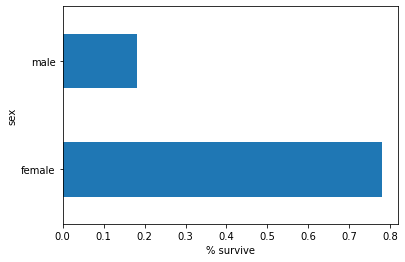

In [112]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [0]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [0]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [115]:
ds = make_input_fn(dftrain, y_train, batch_size=10)()
for feature_batch, label_batch in ds.take(1):
    print('특성 키:', list(feature_batch.keys()))
    print()
    print('클래스 배치:', feature_batch['class'].numpy())
    print()
    print('레이블 배치:', label_batch.numpy())

특성 키: ['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone']

클래스 배치: [b'Third' b'Third' b'First' b'Third' b'Third' b'Third' b'First' b'Second'
 b'First' b'First']

레이블 배치: [0 1 1 0 0 1 0 1 1 1]


In [116]:
age_column = feature_columns[7]
tf.keras.layers.DenseFeatures([age_column])(feature_batch).numpy()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[40.5],
       [36. ],
       [30. ],
       [28. ],
       [18. ],
       [ 4. ],
       [28. ],
       [22. ],
       [31. ],
       [54. ]], dtype=float32)

In [0]:
tf.keras.backend.set_floatx('float32')

In [121]:
gender_column = feature_columns[0]
tf.keras.layers.DenseFeatures([tf.feature_column.indicator_column(gender_column)])(feature_batch).numpy()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [122]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.7121212, 'accuracy_baseline': 0.625, 'auc': 0.80557096, 'auc_precision_recall': 0.7346215, 'average_loss': 0.7108372, 'label/mean': 0.375, 'loss': 0.71878815, 'precision': 0.5804196, 'prediction/mean': 0.6001698, 'recall': 0.83838385, 'global_step': 200}


In [0]:
age_x_gender = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)

In [124]:
age_x_gender

CrossedColumn(keys=('age', 'sex'), hash_bucket_size=100, hash_key=None)

In [125]:
derived_feature_columns = [age_x_gender]
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)

clear_output()
print(result)

{'accuracy': 0.7537879, 'accuracy_baseline': 0.625, 'auc': 0.84533215, 'auc_precision_recall': 0.78556055, 'average_loss': 0.47345594, 'label/mean': 0.375, 'loss': 0.46612775, 'precision': 0.6545454, 'prediction/mean': 0.4196665, 'recall': 0.72727275, 'global_step': 200}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpr1y5j1_d/model.ckpt-200


INFO:tensorflow:Restoring parameters from /tmp/tmpr1y5j1_d/model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_te

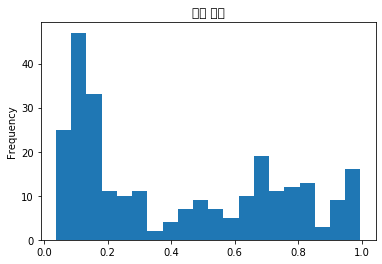

In [126]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='예측 확률')

(0, 1.05)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 53456 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text

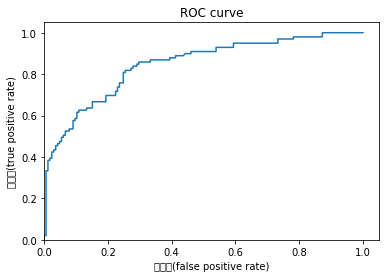

In [127]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_eval, probs)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('오탐률(false positive rate)')
plt.ylabel('정탐률(true positive rate)')
plt.xlim(0,)
plt.ylim(0,)

In [0]:
### 2번째

In [130]:
age_column = feature_columns[7]
tf.keras.layers.DenseFeatures([age_column])(feature_batch).numpy()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[40.5],
       [36. ],
       [30. ],
       [28. ],
       [18. ],
       [ 4. ],
       [28. ],
       [22. ],
       [31. ],
       [54. ]], dtype=float32)

In [131]:
gender_column = feature_columns[0]
tf.keras.layers.DenseFeatures([tf.feature_column.indicator_column(gender_column)])(feature_batch).numpy()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [0]:
age_x_gender = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)
derived_feature_columns = [age_x_gender]

In [133]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)
print(result)

pred_dicts = list(linear_est.predict(eval_input_fn))

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpln_cqxte', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f067e79f400>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpln_cqxte', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f067e79f400>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpln_cqxte/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpln_cqxte/model.ckpt.


INFO:tensorflow:loss = 0.6931472, step = 0


INFO:tensorflow:loss = 0.6931472, step = 0


INFO:tensorflow:global_step/sec: 180.848


INFO:tensorflow:global_step/sec: 180.848


INFO:tensorflow:loss = 0.45290697, step = 100 (0.555 sec)


INFO:tensorflow:loss = 0.45290697, step = 100 (0.555 sec)


INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmpln_cqxte/model.ckpt.


INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmpln_cqxte/model.ckpt.


INFO:tensorflow:Loss for final step: 0.5340123.


INFO:tensorflow:Loss for final step: 0.5340123.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-12-06T15:50:26Z


INFO:tensorflow:Starting evaluation at 2019-12-06T15:50:26Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpln_cqxte/model.ckpt-200


INFO:tensorflow:Restoring parameters from /tmp/tmpln_cqxte/model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-12-06-15:50:27


INFO:tensorflow:Finished evaluation at 2019-12-06-15:50:27


INFO:tensorflow:Saving dict for global step 200: accuracy = 0.7462121, accuracy_baseline = 0.625, auc = 0.8136517, auc_precision_recall = 0.7395135, average_loss = 0.57620806, global_step = 200, label/mean = 0.375, loss = 0.5706952, precision = 0.78571427, prediction/mean = 0.24062029, recall = 0.44444445


INFO:tensorflow:Saving dict for global step 200: accuracy = 0.7462121, accuracy_baseline = 0.625, auc = 0.8136517, auc_precision_recall = 0.7395135, average_loss = 0.57620806, global_step = 200, label/mean = 0.375, loss = 0.5706952, precision = 0.78571427, prediction/mean = 0.24062029, recall = 0.44444445


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /tmp/tmpln_cqxte/model.ckpt-200


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /tmp/tmpln_cqxte/model.ckpt-200


{'accuracy': 0.7462121, 'accuracy_baseline': 0.625, 'auc': 0.8136517, 'auc_precision_recall': 0.7395135, 'average_loss': 0.57620806, 'label/mean': 0.375, 'loss': 0.5706952, 'precision': 0.78571427, 'prediction/mean': 0.24062029, 'recall': 0.44444445, 'global_step': 200}
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpln_cqxte/model.ckpt-200


INFO:tensorflow:Restoring parameters from /tmp/tmpln_cqxte/model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [0]:
### 3번째

In [135]:
age_column = feature_columns[7]
tf.keras.layers.DenseFeatures([age_column])(feature_batch).numpy()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[40.5],
       [36. ],
       [30. ],
       [28. ],
       [18. ],
       [ 4. ],
       [28. ],
       [22. ],
       [31. ],
       [54. ]], dtype=float32)

In [136]:
gender_column = feature_columns[0]
tf.keras.layers.DenseFeatures([tf.feature_column.indicator_column(gender_column)])(feature_batch).numpy()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [0]:
age_x_gender = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)
derived_feature_columns = [age_x_gender]

In [138]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)
print(result)

pred_dicts = list(linear_est.predict(eval_input_fn))

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0n2o14w6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f067e78e4e0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0n2o14w6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f067e78e4e0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp0n2o14w6/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp0n2o14w6/model.ckpt.


INFO:tensorflow:loss = 0.6931472, step = 0


INFO:tensorflow:loss = 0.6931472, step = 0


INFO:tensorflow:global_step/sec: 159.724


INFO:tensorflow:global_step/sec: 159.724


INFO:tensorflow:loss = 0.2981315, step = 100 (0.634 sec)


INFO:tensorflow:loss = 0.2981315, step = 100 (0.634 sec)


INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmp0n2o14w6/model.ckpt.


INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmp0n2o14w6/model.ckpt.


INFO:tensorflow:Loss for final step: 0.6437392.


INFO:tensorflow:Loss for final step: 0.6437392.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-12-06T15:50:47Z


INFO:tensorflow:Starting evaluation at 2019-12-06T15:50:47Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp0n2o14w6/model.ckpt-200


INFO:tensorflow:Restoring parameters from /tmp/tmp0n2o14w6/model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-12-06-15:50:48


INFO:tensorflow:Finished evaluation at 2019-12-06-15:50:48


INFO:tensorflow:Saving dict for global step 200: accuracy = 0.77272725, accuracy_baseline = 0.625, auc = 0.85053563, auc_precision_recall = 0.78949857, average_loss = 0.462564, global_step = 200, label/mean = 0.375, loss = 0.45244423, precision = 0.7096774, prediction/mean = 0.3608569, recall = 0.6666667


INFO:tensorflow:Saving dict for global step 200: accuracy = 0.77272725, accuracy_baseline = 0.625, auc = 0.85053563, auc_precision_recall = 0.78949857, average_loss = 0.462564, global_step = 200, label/mean = 0.375, loss = 0.45244423, precision = 0.7096774, prediction/mean = 0.3608569, recall = 0.6666667


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /tmp/tmp0n2o14w6/model.ckpt-200


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /tmp/tmp0n2o14w6/model.ckpt-200


{'accuracy': 0.77272725, 'accuracy_baseline': 0.625, 'auc': 0.85053563, 'auc_precision_recall': 0.78949857, 'average_loss': 0.462564, 'label/mean': 0.375, 'loss': 0.45244423, 'precision': 0.7096774, 'prediction/mean': 0.3608569, 'recall': 0.6666667, 'global_step': 200}
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp0n2o14w6/model.ckpt-200


INFO:tensorflow:Restoring parameters from /tmp/tmp0n2o14w6/model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [0]:
### 암기

In [140]:
age_column = feature_columns[7]
tf.keras.layers.DenseFeatures([age_column])(feature_batch).numpy()

gender_column = feature_columns[0]
tf.keras.layers.DenseFeatures([tf.feature_column.indicator_column(gender_column)])(feature_batch).numpy()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [0]:
age_x_gender = tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100)
derived_feature_columns = [age_x_gender]

In [139]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns+derived_feature_columns)
linear_est.train(train_input_fn)
result = linear_est.evaluate(eval_input_fn)
print(result)

pred_dicts = list(linear_est.predict(eval_input_fn))

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp1ubizkb6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f067adb99e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp1ubizkb6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f067adb99e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp1ubizkb6/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp1ubizkb6/model.ckpt.


INFO:tensorflow:loss = 0.6931472, step = 0


INFO:tensorflow:loss = 0.6931472, step = 0


INFO:tensorflow:global_step/sec: 189.387


INFO:tensorflow:global_step/sec: 189.387


INFO:tensorflow:loss = 0.4765669, step = 100 (0.533 sec)


INFO:tensorflow:loss = 0.4765669, step = 100 (0.533 sec)


INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmp1ubizkb6/model.ckpt.


INFO:tensorflow:Saving checkpoints for 200 into /tmp/tmp1ubizkb6/model.ckpt.


INFO:tensorflow:Loss for final step: 0.49947608.


INFO:tensorflow:Loss for final step: 0.49947608.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2019-12-06T15:51:02Z


INFO:tensorflow:Starting evaluation at 2019-12-06T15:51:02Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp1ubizkb6/model.ckpt-200


INFO:tensorflow:Restoring parameters from /tmp/tmp1ubizkb6/model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2019-12-06-15:51:03


INFO:tensorflow:Finished evaluation at 2019-12-06-15:51:03


INFO:tensorflow:Saving dict for global step 200: accuracy = 0.7613636, accuracy_baseline = 0.625, auc = 0.84389347, auc_precision_recall = 0.7828381, average_loss = 0.48225006, global_step = 200, label/mean = 0.375, loss = 0.4761125, precision = 0.65789473, prediction/mean = 0.435206, recall = 0.75757575


INFO:tensorflow:Saving dict for global step 200: accuracy = 0.7613636, accuracy_baseline = 0.625, auc = 0.84389347, auc_precision_recall = 0.7828381, average_loss = 0.48225006, global_step = 200, label/mean = 0.375, loss = 0.4761125, precision = 0.65789473, prediction/mean = 0.435206, recall = 0.75757575


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /tmp/tmp1ubizkb6/model.ckpt-200


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 200: /tmp/tmp1ubizkb6/model.ckpt-200


{'accuracy': 0.7613636, 'accuracy_baseline': 0.625, 'auc': 0.84389347, 'auc_precision_recall': 0.7828381, 'average_loss': 0.48225006, 'label/mean': 0.375, 'loss': 0.4761125, 'precision': 0.65789473, 'prediction/mean': 0.435206, 'recall': 0.75757575, 'global_step': 200}
INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp1ubizkb6/model.ckpt-200


INFO:tensorflow:Restoring parameters from /tmp/tmp1ubizkb6/model.ckpt-200


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.
